<a href="https://colab.research.google.com/github/shameerkplna/PROJECT-REPORTS/blob/main/Adult_Income_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go
import plotly.io as pio

import warnings
warnings.filterwarnings("ignore")

In [2]:
#Load the Dataset
df=pd.read_csv("/content/Income Prediction -Adults.csv")

df.head(5)

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,country,salary
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,0
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,0
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,0
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,0
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,0


In [3]:
#Shape of Dataset (Row, Column)
print("(Row, Column) =",df.shape)

(Row, Column) = (32561, 15)


In [4]:
#Structure of Dataset
print("Dataset Information:", df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education-num   32561 non-null  int64 
 5   marital-status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital-gain    32561 non-null  int64 
 11  capital-loss    32561 non-null  int64 
 12  hours-per-week  32561 non-null  int64 
 13  country         32561 non-null  object
 14  salary          32561 non-null  int64 
dtypes: int64(7), object(8)
memory usage: 3.7+ MB
Dataset Information: None


In [5]:
#Column Headings
print("Column Headings:", df.columns)

Column Headings: Index(['age', 'workclass', 'fnlwgt', 'education', 'education-num',
       'marital-status', 'occupation', 'relationship', 'race', 'sex',
       'capital-gain', 'capital-loss', 'hours-per-week', 'country', 'salary'],
      dtype='object')


In [6]:
#Statistics of the Data
df.describe()

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week,salary
count,32561.000000,3.256100e+04,32561.000000,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,1.897784e+05,10.080679,1077.648844,87.303830,40.437456,0.240810
std,13.640433,1.055500e+05,2.572720,7385.292085,402.960219,12.347429,0.427581
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000,0.000000
25%,28.000000,1.178270e+05,9.000000,0.000000,0.000000,40.000000,0.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000,0.000000
75%,48.000000,2.370510e+05,12.000000,0.000000,0.000000,45.000000,0.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000,1.000000


In [7]:
# Missing Values
df.isnull().sum()

,0
age,0
workclass,0
fnlwgt,0
education,0
education-num,0
marital-status,0
occupation,0
relationship,0
race,0
sex,0


In [8]:
# Check the age values to ensure they are within the specified range
print("Age range in the data:", df['age'].min(), "to", df['age'].max())

# Create age groups with adjusted bin range
bins = [0, 35, 55, 100]  # Age group boundaries
labels = ['0-30', '31-60', '61-90']
df['age_group'] = pd.cut(df['age'], bins=bins, labels=labels, right=False)

# Calculate min, max, and mean age for each age group
age_group_stats = df.groupby('age_group')['age'].agg(['min', 'max', 'mean']).reset_index()

# Display the result
display(age_group_stats)

Age range in the data: 17 to 90


,age_group,min,max,mean
0,0-30,17,34,26.134387
1,31-60,35,54,43.376607
2,61-90,55,90,62.477595


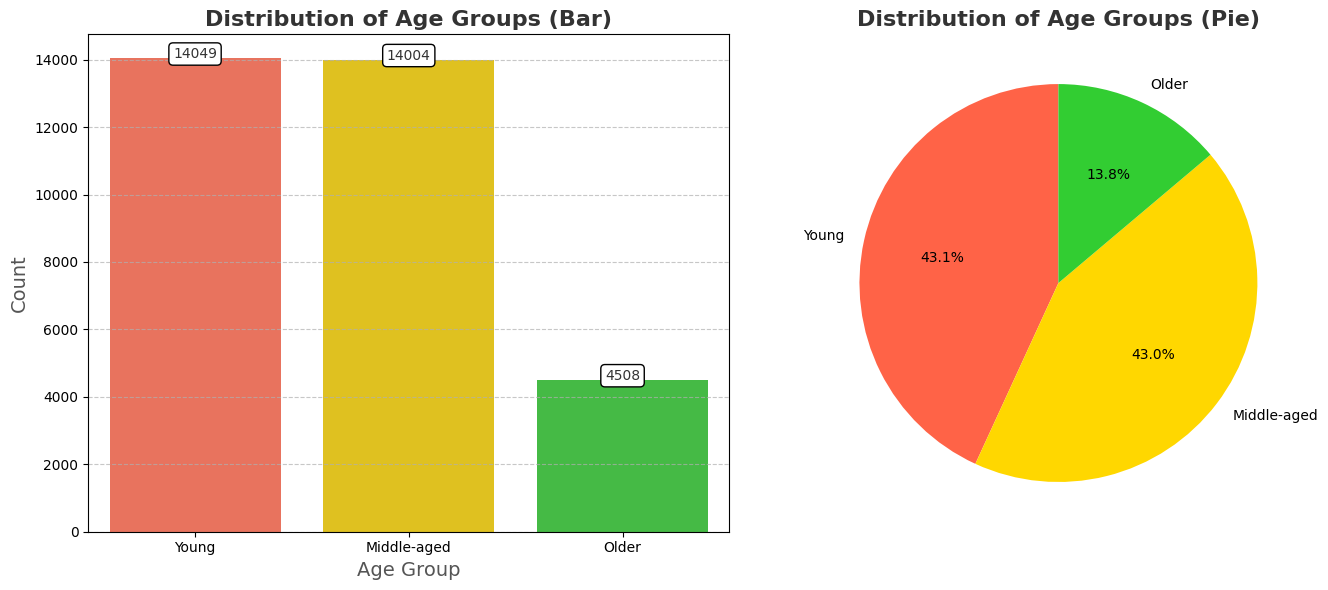

In [9]:
#Categorization into Groups
bins = [0, 35, 55, 100]  # Age group boundaries
labels = ['Young', 'Middle-aged', 'Older']
df['age_group'] = pd.cut(df['age'], bins=bins, labels=labels, right=False)

# Display the distribution of age groups
age_group_distribution = df['age_group'].value_counts()

# Vibrant custom color palette (bright, energetic colors)
custom_colors = ['#FF6347', '#FFD700', '#32CD32']  # Tomato, Gold, Lime Green

#Create subplots: One for bar plot and one for pie chart
fig, ax = plt.subplots(1, 2, figsize=(14, 6))
# Pie chart
ax[1].pie(age_group_distribution.values, labels=age_group_distribution.index, autopct='%1.1f%%', startangle=90, colors=custom_colors)
ax[1].set_title('Distribution of Age Groups (Pie)', fontsize=16, fontweight='bold', color='#333333')

# Bar plot
sns.barplot(x=age_group_distribution.index, y=age_group_distribution.values, palette=custom_colors, ax=ax[0])
ax[0].set_title('Distribution of Age Groups (Bar)', fontsize=16, fontweight='bold', color='#333333')
ax[0].set_xlabel('Age Group', fontsize=14, color='#555555')
ax[0].set_ylabel('Count', fontsize=14, color='#555555')
ax[0].grid(True, axis='y', linestyle='--', alpha=0.7)

# Adding values above bars within a container
for i, value in enumerate(age_group_distribution.values):
    ax[0].text(i, value + 0.2, str(value), ha='center', fontsize=10, color='#333333',
               bbox=dict(facecolor='white', edgecolor='black', boxstyle='round,pad=0.3'))

# Display the plot
plt.tight_layout()
plt.show()

In [10]:
#Salary on the basis of age Group
import pandas as pd
# Create age groups with adjusted bin range
bins = [0, 35, 55, 100]  # Age group boundaries
labels = ['0-30', '31-60', '61-90']
df['age_group'] = pd.cut(df['age'], bins=bins, labels=labels, right=False)

# Grouping by 'age_group' and 'salary' to get the distribution
age_salary_group = df.groupby(['age_group', 'salary']).size().unstack(fill_value=0)

print("\nSalary distribution by age group:")
display(age_salary_group)



Salary distribution by age group:


salary,0,1
age_group,,
0-30,12561,1488
31-60,8953,5051
61-90,3206,1302


In [11]:
# Summary statistics of hours-per-week
hours_per_week_stats = df['hours-per-week'].describe()

# Analyze hours-per-week distribution by education and occupation, calculating mean and max
hours_per_week_by_education_occupation = df.groupby(['education', 'occupation'])['hours-per-week'].agg(['mean', 'max']).reset_index()

# Sort by mean hours-per-week in descending order and take top 20 values
hours_per_week_by_education_occupation_sorted = hours_per_week_by_education_occupation.sort_values(by='mean', ascending=False).head(20)

print("\nSummary Statistics of Hours-Per-Week:")
display(hours_per_week_stats)
print("=====================================================")
print("\nHours-Per-Week by Education and Occupation Analysis:")
display(hours_per_week_by_education_occupation_sorted)


Summary Statistics of Hours-Per-Week:


,hours-per-week
count,32561.000000
mean,40.437456
std,12.347429
min,1.000000
25%,40.000000
50%,40.000000
75%,45.000000
max,99.000000



Hours-Per-Week by Education and Occupation Analysis:


,education,occupation,mean,max
58,5th-6th,Exec-managerial,67.000000,67
171,Masters,Farming-fishing,66.600000,99
146,Doctorate,Other-service,60.000000,60
142,Doctorate,Craft-repair,55.000000,60
115,Assoc-voc,Farming-fishing,54.750000,99
45,1st-4th,Exec-managerial,51.750000,67
46,1st-4th,Farming-fishing,51.666667,96
204,Some-college,Armed-Forces,50.000000,60
130,Bachelors,Farming-fishing,49.298701,99
197,Prof-school,Prof-specialty,48.955752,99


In [12]:
# Education distribution by salary
education_salary_distribution = df.groupby('education')['salary'].value_counts(normalize=True).unstack().fillna(0)

print("\nEducation Distribution by Salary:")
display(education_salary_distribution)


Education Distribution by Salary:


salary,0,1
education,,
10th,0.933548,0.066452
11th,0.948936,0.051064
12th,0.923788,0.076212
1st-4th,0.964286,0.035714
5th-6th,0.951952,0.048048
7th-8th,0.938080,0.061920
9th,0.947471,0.052529
Assoc-acdm,0.751640,0.248360
Assoc-voc,0.738784,0.261216


In [13]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import pandas as pd

# Create subplots with 2 rows and 2 columns
fig = make_subplots(
    rows=2, cols=2,
    subplot_titles=("Salary Distribution by Education", "Salary Distribution by Occupation",
                    "Salary Distribution by Country", "Total Capital Gain and Loss by Education"),
    vertical_spacing=0.15
)

# Add Salary Distribution by Education plot (fig1)
salary_by_education = df.groupby('education')['salary'].value_counts(normalize=True).unstack().fillna(0)
for salary in salary_by_education.columns:
    fig.add_trace(go.Bar(
        x=salary_by_education.index,
        y=salary_by_education[salary],
        name=f"Salary Distribution by Education: {salary}",
        hovertemplate="<b>Education:</b> %{x}<br><b>Salary:</b> %{fullData.name}<br><b>Proportion:</b> %{y:.2f}<extra></extra>",
        text=salary_by_education[salary].apply(lambda x: f"<b>{x:.2f}</b>"),  # Make text bold
        textposition='outside'  # Place text above the bars
    ), row=1, col=1)

# Add Salary Distribution by Occupation plot (fig2)
salary_by_occupation = df.groupby('occupation')['salary'].value_counts(normalize=True).unstack().fillna(0)
for salary in salary_by_occupation.columns:
    fig.add_trace(go.Bar(
        x=salary_by_occupation.index,
        y=salary_by_occupation[salary],
        name=f"Salary Distribution by Occupation: {salary}",
        hovertemplate="<b>Occupation:</b> %{x}<br><b>Salary:</b> %{fullData.name}<br><b>Proportion:</b> %{y:.2f}<extra></extra>",
        text=salary_by_occupation[salary].apply(lambda x: f"<b>{x:.2f}</b>"),  # Make text bold
        textposition='outside'  # Place text above the bars
    ), row=1, col=2)

# Replace '?' in the 'country' column with the mode (most frequent value)
mode_country = df['country'].mode()[0]
df['country'] = df['country'].replace(' ?', mode_country)

# Add Salary Distribution by Country plot (fig3)
salary_by_country = df.groupby('country')['salary'].value_counts(normalize=True).unstack().fillna(0)
for salary in salary_by_country.columns:
    fig.add_trace(go.Bar(
        x=salary_by_country.index,
        y=salary_by_country[salary],
        name=f"Salary Distribution by Country: {salary}",
        hovertemplate="<b>Country:</b> %{x}<br><b>Salary:</b> %{fullData.name}<br><b>Proportion:</b> %{y:.2f}<extra></extra>",
        text=salary_by_country[salary].apply(lambda x: f"<b>{x:.2f}</b>"),  # Make text bold
        textposition='outside'  # Place text above the bars
    ), row=2, col=1)

# Total capital gain and capital loss by education
capital_gain_loss_analysis = df.groupby('education')[['capital-gain', 'capital-loss']].sum().reset_index()

# Add separate bars for Total Capital Gain and Capital Loss (fig4)
fig.add_trace(go.Bar(
    x=capital_gain_loss_analysis['education'],
    y=capital_gain_loss_analysis['capital-gain'],
    name="Total Capital Gain",
    marker=dict(color='green'),
    hovertemplate="<b>Education:</b> %{x}<br><b>Total Capital Gain:</b> %{y:.2f}<extra></extra>",
    text=capital_gain_loss_analysis['capital-gain'].apply(lambda x: f"<b>{x:.2f}</b>"),  # Make text bold
    textposition='outside'  # Place text above the bars
), row=2, col=2)

fig.add_trace(go.Bar(
    x=capital_gain_loss_analysis['education'],
    y=capital_gain_loss_analysis['capital-loss'],
    name="Total Capital Loss",
    marker=dict(color='red'),
    hovertemplate="<b>Education:</b> %{x}<br><b>Total Capital Loss:</b> %{y:.2f}<extra></extra>",
    text=capital_gain_loss_analysis['capital-loss'].apply(lambda x: f"<b>{x:.0f}</b>"),  # Make text bold
    textposition='outside',  # Place text above the bars
), row=2, col=2)

# Update layout for the entire figure with increased font size and decreased legend font size
fig.update_layout(
    title="<b>Salary and Financial Analysis</b>",  # Make title bold
    title_font_size=24,  # Increase title font size
    showlegend=True,  # Ensure the legend is shown
    height=1200,
    width=2000,  # Set figure height
    template="plotly_white",
    barmode='group',  # Set barmode to 'group' to show separate bars
    font=dict(size=18),  # Increase font size for all texts
    hoverlabel=dict(font=dict(size=16)),  # Increase font size for hover text
    xaxis=dict(tickfont=dict(size=14)),  # Decrease font size for x-axis labels
    xaxis2=dict(tickfont=dict(size=14)),  # Decrease font size for x-axis labels in subplot 2
    xaxis3=dict(tickfont=dict(size=14)),  # Decrease font size for x-axis labels in subplot 3
    xaxis4=dict(tickfont=dict(size=14)),  # Decrease font size for x-axis labels in subplot 4
    legend=dict(
        font=dict(size=12)  # Decrease legend font size
    )
)

# Show the subplot figure
fig.show()

Accuracy: 0.8259
              precision    recall  f1-score   support

           0       0.85      0.94      0.89      4942
           1       0.72      0.46      0.56      1571

    accuracy                           0.83      6513
   macro avg       0.78      0.70      0.73      6513
weighted avg       0.81      0.83      0.81      6513



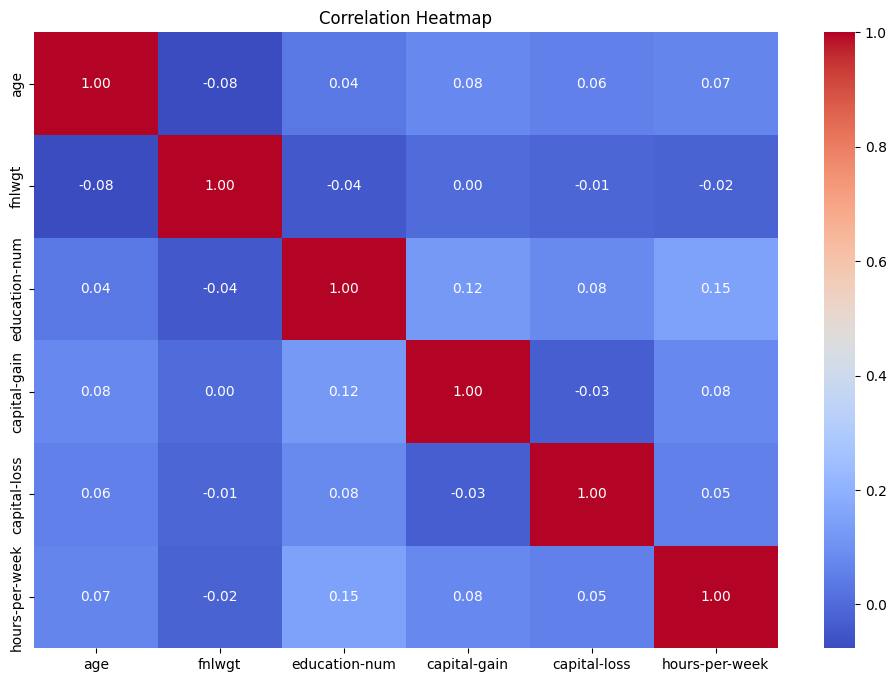

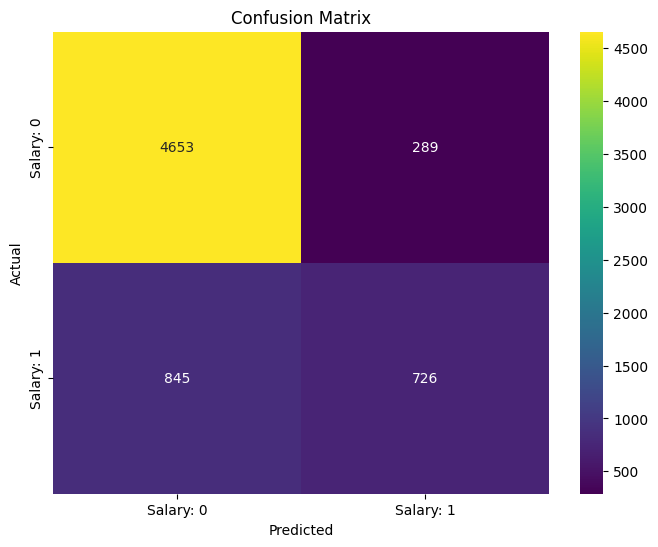

In [14]:
#Train & Evaluate Logistic Regression
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LogisticRegression  # Import Logistic Regression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Encode categorical variables
le = LabelEncoder()
categorical_cols = ['workclass', 'age_group', 'education', 'marital-status', 'occupation', 'relationship', 'race', 'sex', 'country', 'salary']
for col in categorical_cols:
    df[col] = le.fit_transform(df[col])

# Define features and target
X = df.drop('salary', axis=1)
y = df['salary']

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train a Logistic Regression model
model = LogisticRegression(random_state=42, max_iter=1000)  # Logistic Regression with max_iter set
model.fit(X_train_scaled, y_train)

# Make predictions
y_pred = model.predict(X_test_scaled)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.4f}')
print(classification_report(y_test, y_pred))

# Correlation heatmap for numeric features
df_encoded = pd.get_dummies(df, columns=categorical_cols, drop_first=True)
numeric_df = df_encoded.select_dtypes(include=[np.number])
plt.figure(figsize=(12, 8))
sns.heatmap(numeric_df.corr(), annot=True, fmt='.2f', cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)

# Plot confusion matrix with Viridis color palette
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='viridis', xticklabels=['Salary: 0', 'Salary: 1'], yticklabels=['Salary: 0', 'Salary: 1'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [15]:
#Model Performance & Interpretations:¶
#By Using the logistic regression, the model achieved an overall accuracy of 82.77%. This indicates that a significant proportion of the predictions made by the model were correct.
#The accuracy of the logistic regression model is 82.77%. This means that approximately 83% of the time, the model correctly predicts whether an individual earns above or below the income threshold.
#Precision, Recall, and F1-Score:
#Precision for class 0 (income ≤ $50K) is 0.85, which means that when the model predicts an income of less than $50K, 85% of those predictions are correct.
#Recall for class 0 is 0.94, meaning that the model is correctly identifying 94% of the true cases where income is less than $50K.
#Precision for class 1 (income > $50K) is 0.73, which indicates that when the model predicts a higher income 73% of the predictions are correct.
#And Recall for class 1 is 0.46which indicates that the model correctly identifies only 46% of the true cases where income is above $50K. Confusion Matrix:
#True Positives (4670): These are the individuals who are correctly predicted to have a lower income (class 0). The model is good at recognizing most of these individuals.
#False Positives (272): These are individuals who are classified as low-income, but actually have a higher income (class 1). This is a small number compared to the total low-income group.
#False Negatives (850): These individuals are predicted to have a lower income but actually earn more. .
#True Negatives (721): These are the correctly identified high-income individuals who are predicted as class 1.